In [2]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import rasterio
import scipy.stats as stats

path = "../data/city_map/"
county = ['BIBE', 'FRBG', 'RORO', 'HOU', 'EVER', 'ARCA', 'WEST', 'MIA']
city_name = ["Brewster", "Fredericksburg", "Round Rock", "Houston", "Everglades", "Arcadia", "Weston", "Miami"]

# Get list of files ending in ".tiff" in the directory
files = [f for f in os.listdir(path) if f.endswith('.tiff')]

# Sort files by year
files = sorted(files, key=lambda x: int(re.findall('\d\d\d\d', x)[0]))

In [4]:
print(f"{'County'},{'Year'},{'Mean'},{'Median'},{'Mode'},{'Variance'},{'Std Dev'}")
for cou in county:
    # Define arrays to store data
    means = []
    medians = []
    modes = []
    variances = []
    stds = []
    # Loop through files and calculate statistics
    for file in [f for f in files if cou in f]:
        # Open file
        with rasterio.open(os.path.join(path, file)) as src:
            # Read data as numpy array
            data = src.read(1)

            # Calculate statistics
            means.append(np.mean(data))
            medians.append(np.median(data))
            modes.append(float(stats.mode(data, axis=None)[0]))
            variances.append(np.var(data))
            stds.append(np.std(data))

    years = range(2013, 2021)
    for i, year in enumerate(years):
        print(
            f"{city_name[county.index(cou)]},{year},{means[i]},{medians[i]},{modes[i]},{variances[i]},{stds[i]}")


County,Year,Mean,Median,Mode,Variance,Std Dev
Brewster,2013,0.0020027835853397846,0.0,0.0,0.0012234821915626526,0.03497831150889397
Brewster,2014,0.0018017623806372285,0.0,0.0,0.0010945274261757731,0.03308364376425743
Brewster,2015,0.001795718097127974,0.0,0.0,0.0012873277300968766,0.03587935119867325
Brewster,2016,0.0015309128211811185,0.0,0.0,0.0010810275562107563,0.03287898376584053
Brewster,2017,0.002147188875824213,0.0,0.0,0.0015269722789525986,0.03907649219036102
Brewster,2018,0.0020002552773803473,0.0,0.0,0.0014364162925630808,0.037900082767009735
Brewster,2019,0.0016711675561964512,0.0,0.0,0.0011568504851311445,0.034012503921985626
Brewster,2020,0.0017579741543158889,0.0,0.0,0.0012679608771577477,0.0356084369122982
Fredericksburg,2013,0.36218777298927307,0.0,0.0,6.4319939613342285,2.536137580871582
Fredericksburg,2014,0.33512312173843384,0.0,0.0,5.294873237609863,2.3010592460632324
Fredericksburg,2015,0.31535133719444275,0.0,0.0,4.634956359863281,2.152894973754883
Fredericksbur

0%: 0.001408074051141739
5%: 0.41606463491916656
10%: 0.48122715950012207
15%: 0.5372955799102783
20%: 0.5919170379638672
25%: 0.6481878757476807
30%: 0.7082405686378479
35%: 0.7743396162986755
40%: 0.8490638732910156
45%: 0.9356980323791504
50%: 1.0387734174728394
55%: 1.1651360392570496
60%: 1.3251407146453857
65%: 1.536352515220642
70%: 1.8307133913040161
75%: 2.2695943117141724
80%: 2.9865095615386963
85%: 4.312052965164185
90%: 7.199238300323486
92%: 9.369123268127481
94%: 12.801125335693342
96%: 18.74659423828126
98%: 31.243295288085847
100%: 92084.4375


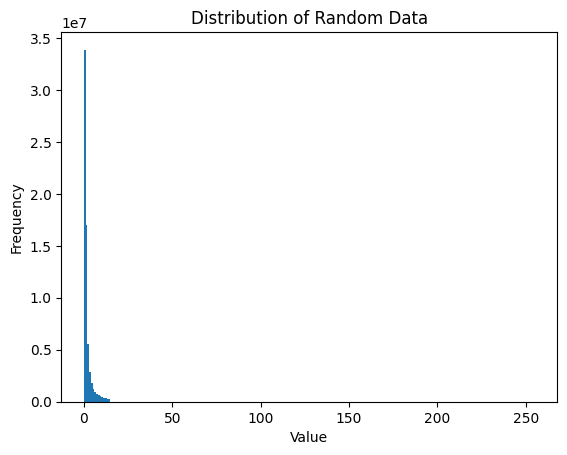

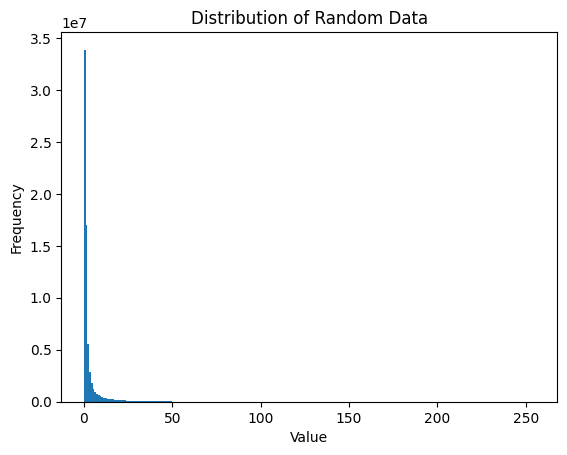

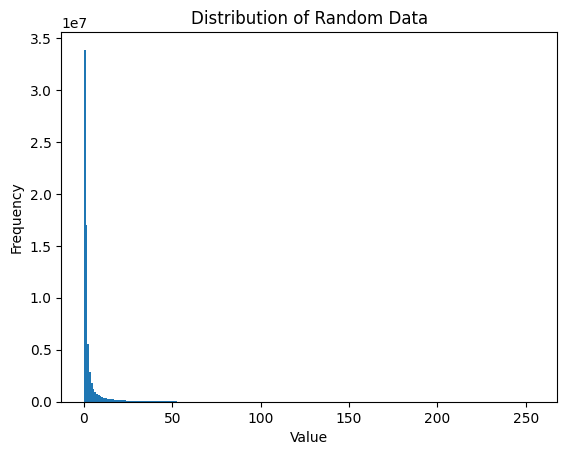

In [9]:
# the max min globally
with rasterio.open("../data/VNL_v21_npp_2020_global_vcmslcfg_c202205302300.average_masked.dat.tif") as src:
    data = src.read()
    #print("max", np.max(data), "min", np.min(data))
    # calculate the quartiles
    data_cal = data[data > 0]
    for pc in range(0, 90, 5):
        print(f"{pc}%:", np.percentile(data_cal, pc))
    for pc in range(90, 101, 2):
        print(f"{pc}%:", np.percentile(data_cal, pc))

    # Plot the histogram
    flattened_array = data_cal.flatten()
    for m in [15, 50, 500]:
        # plot the distribution of the flattened array
        plt.hist(flattened_array[flattened_array < m], bins=256, range=(0, 255))
        plt.title('Distribution of Random Data')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        # Show the plot
        plt.show()

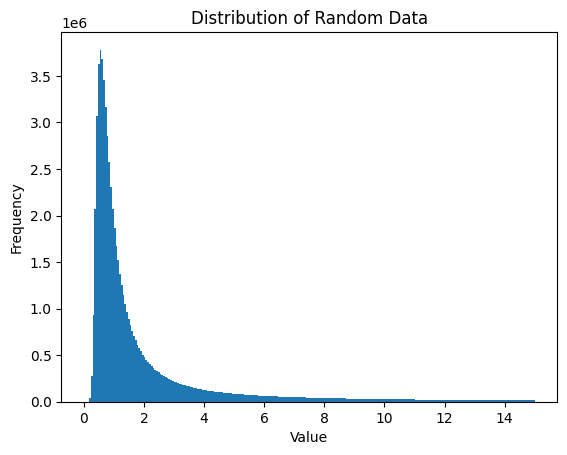

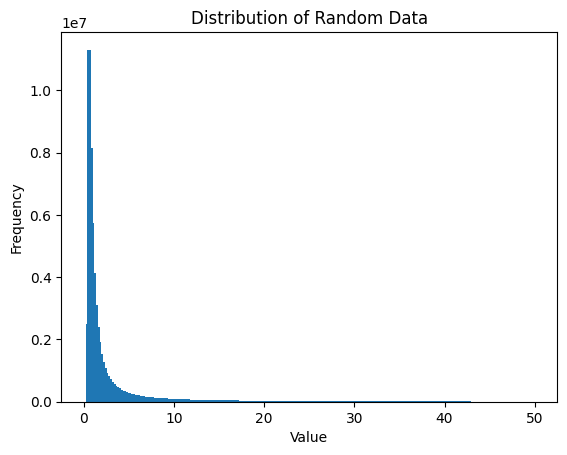

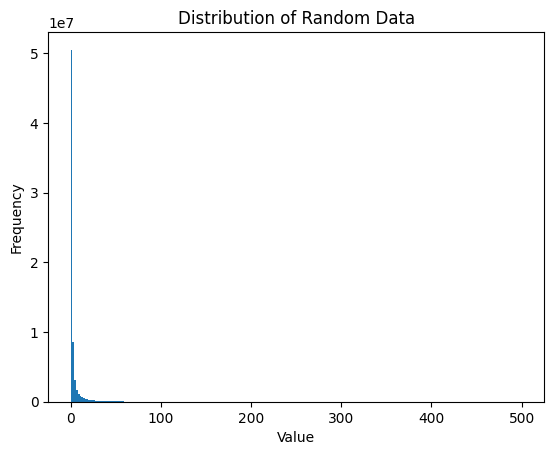

In [10]:
for m in [15, 50, 500]:
    # plot the distribution of the flattened array
    plt.hist(flattened_array[flattened_array < m], bins=256)
    plt.title('Distribution of Random Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    # Show the plot
    plt.show()

In [27]:
# Define the number of bins
n_bins = 20
# Flatten the array
flat_arr = data_cal.flatten()
# Calculate the bin edges using the equal frequency technique
bin_edges = np.interp(np.linspace(0, len(flat_arr), n_bins + 1),
                      np.arange(len(flat_arr)),
                      np.sort(flat_arr))
# Apply the bin edges to the flattened array to get the binned array
binned_arr = np.digitize(flat_arr, bin_edges)
# Reshape the binned array back to its original shape
binned_arr = binned_arr.reshape(data_cal.shape)
# Print the binned array
print(binned_arr)


[10 10 10 ...  6  6  6]


In [28]:
bin_edges

array([1.40807405e-03, 4.16064636e-01, 4.81227160e-01, 5.37295580e-01,
       5.91917050e-01, 6.48187876e-01, 7.08240569e-01, 7.74339616e-01,
       8.49063897e-01, 9.35698032e-01, 1.03877342e+00, 1.16513610e+00,
       1.32514071e+00, 1.53635253e+00, 1.83071347e+00, 2.26959449e+00,
       2.98650975e+00, 4.31205320e+00, 7.19923916e+00, 1.53250350e+01,
       9.20844375e+04])

In [20]:
# Calculate the logarithmic distribution of the data
log_data = np.log10(data_cal.flatten())

# Determine the bin edges for the logarithmic distribution
log_bins = np.logspace(log_data.min(), log_data.max(), 10)

# Categorize the data based on the logarithmic distribution
data_categories = np.digitize(log_data, log_bins, right=True)

# Print the results
print("Original data:", data)
print("Logarithmic data:", log_data)
print("Logarithmic bin edges:", log_bins)
print("Data categories:", data_categories)

Original data: [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
Logarithmic data: [-0.00443284  0.00515389 -0.00369787 ... -0.17158161 -0.1610736
 -0.16062237]
Logarithmic bin edges: [1.40807443e-03 1.03997101e-02 7.68098385e-02 5.67299593e-01
 4.18994278e+00 3.09459423e+01 2.28559529e+02 1.68808749e+03
 1.24678214e+04 9.20844273e+04]
Data categories: [0 1 0 ... 0 0 0]


In [21]:
[1.40807443e-03, 1.03997101e-02, 7.68098385e-02, 5.67299593e-01,
 4.18994278e+00, 3.09459423e+01, 2.28559529e+02, 1.68808749e+03,
 1.24678214e+04, 9.20844273e+04]

[0.00140807443,
 0.0103997101,
 0.0768098385,
 0.567299593,
 4.18994278,
 30.9459423,
 228.559529,
 1688.08749,
 12467.8214,
 92084.4273]

In [25]:
sigma = np.std(data_cal)
mid = float(stats.mode(data_cal, axis=None)[0])

In [26]:
sigma,mid

(49.199745, 0.5539460778236389)

In [30]:
for pc in range(0, 101, 25):
    print(f"{pc}%:", np.percentile(data_cal[data_cal<=18.74659], pc))#0.96 as the boundary

0%: 0.001408074051141739
25%: 0.6366889774799347
50%: 0.9951574802398682
75%: 1.9835894107818604
100%: 18.74658966064453


In [ ]:
0-0.00141:No pollution
0.00141-0.63669:Good
0.63669-0.99516:Moderate
0.99516-1.98359:Unhealthy for sensitive groups
1.98359-18.74658:Unhealthy
18.74658-10000:Hazardous

In [ ]:
Nopollution,0
Good,0.00141
Moderate,0.63669
UnhealthyforSensitiveGroups,0.99516
Unhealthy,1.98359
Hazardous,18.74658